<a href="https://colab.research.google.com/github/aaronjuma/Heart-Disease-Machine-Learning/blob/main/Heart_Disease_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease
### Download from Kaggle

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wallacel","key":"d4846c13171812a348c366972bd73a6b"}'}

In [4]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d kamilpytlak/personal-key-indicators-of-heart-disease

  0% 0.00/3.13M [00:00<?, ?B/s]
100% 3.13M/3.13M [00:00<00:00, 236MB/s]


In [5]:
! mkdir dataset
! unzip personal-key-indicators-of-heart-disease.zip -d dataset

Archive:  personal-key-indicators-of-heart-disease.zip
  inflating: dataset/heart_2020_cleaned.csv  


### Libraries and Dataset Download

In [49]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sb
import os
import tempfile
import matplotlib

In [50]:
# Colour for plots
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
matplotlib.rcParams['figure.figsize'] = (12, 10)

In [7]:
heart = pd.read_csv("/content/dataset/heart_2020_cleaned.csv", index_col=False)

In [8]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


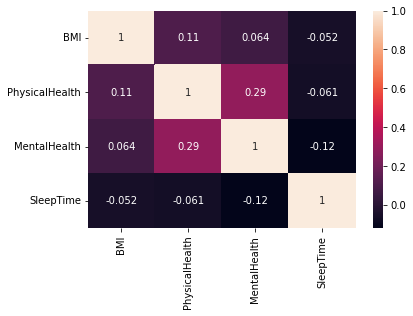

In [ ]:
# Heatmap
dataplot = sb.heatmap(heart.corr(), annot=True)

In [ ]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Prepare dataset
---
This dataset is very imbalanced, use this [page](https://www.tensorflow.org/tutorials/structured_data/imbalanced_data)

In [9]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')
binary = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
rename = []

# perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(heart[binary]).toarray())
# naming the encode (N, Y, N, N, N, Y, Y, Y, N, Y)
for name in binary:
  yes = name + '_Y'
  no = name + '_N'
  rename.append(no)
  rename.append(yes)
#encoder_df.columns = rename

# merge one-hot encoded columns back with original DataFrame
final_df = heart.join(encoder_df)

In [10]:
# This is the exact same thing but using pandas library
heart_encoded = pd.get_dummies(heart, columns=binary)

In [11]:
heart_encoded.head(3)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,No,16.60,3.0,30.0,55-59,5.0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,1
1,No,20.34,0.0,0.0,80 or older,7.0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,No,26.58,20.0,30.0,65-69,8.0,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0


In [12]:
# Deal with the Age Category
age = heart.loc[:, 'AgeCategory']

def age_value(word):
  word = int(word[:2])
  if word == 80:
    return 85
  else:
    return (word+4)/2

In [13]:
age = age.apply(age_value, args=())

In [14]:
heart_encoded = heart_encoded.drop(labels="AgeCategory", axis=1)
heart_encoded = heart_encoded.join(age)

In [ ]:
heart_encoded.head(3)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_No,PhysicalActivity_Yes,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,AgeCategory
0,No,16.60,3.0,30.0,5.0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,29.5
1,No,20.34,0.0,0.0,7.0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,85.0
2,No,26.58,20.0,30.0,8.0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,34.5


In [15]:
# Deal with the Heart_Disease that is to predict
# No heart disease to 0 and Yes heart disease to 1
heart_disease = heart.loc[:, 'HeartDisease']

def heart_history(word):
  if word == 'Yes':
    return 1.0
  else:
    return 0.0

In [16]:
heart_disease = heart_disease.apply(heart_history, args=())

In [17]:
heart_encoded = heart_encoded.drop(labels="HeartDisease", axis=1)
heart_encoded = heart_encoded.join(heart_disease)

In [ ]:
heart_encoded.head(3)

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_No,PhysicalActivity_Yes,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,AgeCategory,HeartDisease
0,16.60,3.0,30.0,5.0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,29.5,0.0
1,20.34,0.0,0.0,7.0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,85.0,0.0
2,26.58,20.0,30.0,8.0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,34.5,0.0


In [ ]:
heart_encoded.info()

In [ ]:
heart_encoded.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,AgeCategory,HeartDisease
count,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,...,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075,0.587523,0.412477,0.931903,0.068097,0.962260,0.037740,...,0.035301,0.356034,0.865939,0.134061,0.963167,0.036833,0.906756,0.093244,31.468112,0.085595
std,6.356100,7.95085,7.955235,1.436007,0.492281,0.492281,0.251912,0.251912,0.190567,0.190567,...,0.184539,0.478826,0.340718,0.340718,0.188352,0.188352,0.290775,0.290775,17.327229,0.279766
min,12.020000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000
25%,24.030000,0.00000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,22.000000,0.000000
50%,27.340000,0.00000,0.000000,7.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,29.500000,0.000000
75%,31.420000,2.00000,3.000000,8.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,34.500000,0.000000
max,94.850000,30.00000,30.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,85.000000,1.000000


In [18]:
# Normalizing the Data of specific columns BMI, Physical, Mental, Sleep and Age Category
normalize = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'AgeCategory']
scaler = sk.preprocessing.MinMaxScaler()
dummy = scaler.fit(heart_encoded[normalize])
dummy = scaler.transform(heart_encoded[normalize])

In [19]:
dummydf = pd.DataFrame(dummy, columns=normalize)

In [44]:
dummydf.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategory
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.196854,0.112390,0.129946,0.265090,0.276596
std,0.076737,0.265028,0.265175,0.062435,0.234152
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.144996,0.000000,0.000000,0.217391,0.148649
50%,0.184957,0.000000,0.000000,0.260870,0.250000
75%,0.234215,0.066667,0.100000,0.304348,0.317568
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
heart_encoded = heart_encoded.drop(labels=normalize, axis=1)

In [21]:
heart_encoded = heart_encoded.join(dummydf)

In [49]:
heart_encoded.describe()

,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,Sex_Female,Sex_Male,...,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategory
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,...,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.587523,0.412477,0.931903,0.068097,0.962260,0.037740,0.861130,0.138870,0.524727,0.475273,...,0.963167,0.036833,0.906756,0.093244,0.085595,0.196854,0.112390,0.129946,0.265090,0.276596
std,0.492281,0.492281,0.251912,0.251912,0.190567,0.190567,0.345812,0.345812,0.499389,0.499389,...,0.188352,0.188352,0.290775,0.290775,0.279766,0.076737,0.265028,0.265175,0.062435,0.234152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.144996,0.000000,0.000000,0.217391,0.148649
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.184957,0.000000,0.000000,0.260870,0.250000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.234215,0.066667,0.100000,0.304348,0.317568
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


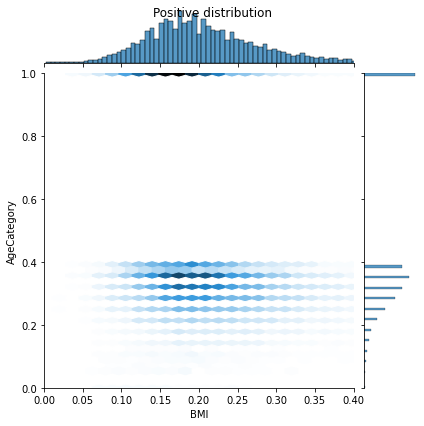

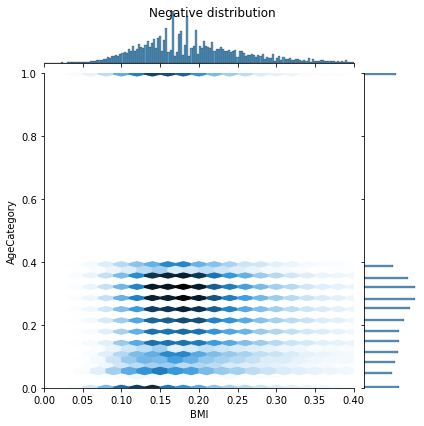

In [22]:
bool_train_labels = np.array(heart_encoded[['HeartDisease']]) != 0
pos_df = pd.DataFrame(heart_encoded[ bool_train_labels], columns=heart_encoded.columns)
neg_df = pd.DataFrame(heart_encoded[~bool_train_labels], columns=heart_encoded.columns)

sb.jointplot(x=pos_df['BMI'], y=pos_df['AgeCategory'],
              kind='hex', xlim=(0, 0.4), ylim=(0,1))
plt.suptitle("Positive distribution")

sb.jointplot(x=neg_df['BMI'], y=neg_df['AgeCategory'],
              kind='hex', xlim=(0, 0.4), ylim=(0,1))
_ = plt.suptitle("Negative distribution")

In [23]:
# Used later for Bias
neg, pos = np.bincount(heart_encoded['HeartDisease'])

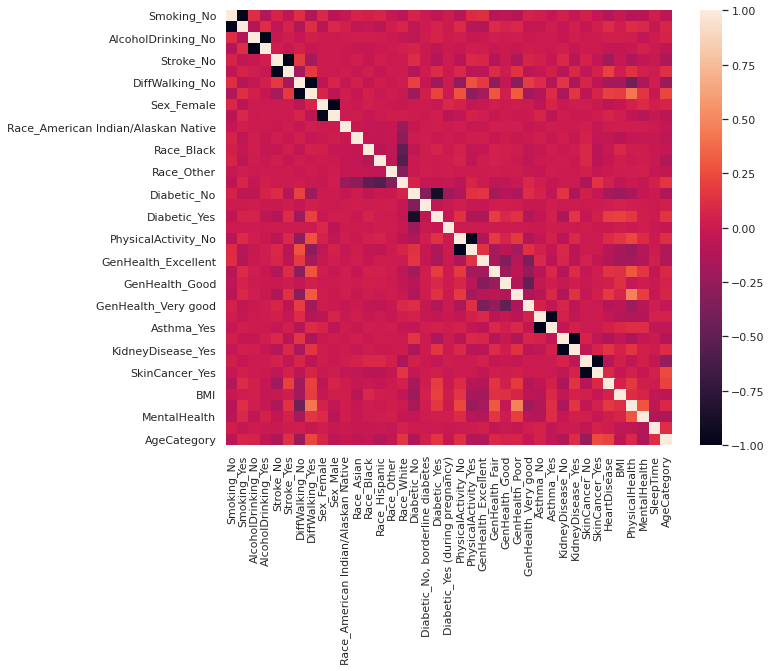

In [50]:
sb.set(rc={'figure.figsize':(10,8)})
sb.heatmap(heart_encoded.corr()) #, annot=True

### Separating into Test Train Val
---
There are 319795 entire and I am spliting 80-10-10 for train-val-test

In [155]:
train=heart_encoded.sample(frac=0.8, ignore_index=True)
test_temp=heart_encoded.drop(train.index)
test=test_temp.sample(frac=0.5)
val=test_temp.drop(test.index)

In [59]:
train.head(2)

,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,Sex_Female,Sex_Male,...,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategory
0,0,1,0,1,1,0,0,1,0,1,...,1,0,1,0,0.0,0.166244,0.000000,0.000000,0.260870,0.283784
1,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,0.0,0.322951,0.166667,0.333333,0.304348,0.182432


In [60]:
test.head(2)

,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,Sex_Female,Sex_Male,...,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategory
303580,0,1,1,0,1,0,0,1,0,1,...,1,0,0,1,0.0,0.247857,0.0,0.000000,0.130435,0.317568
257167,0,1,1,0,1,0,1,0,1,0,...,1,0,1,0,0.0,0.274659,0.0,0.133333,0.217391,0.216216


In [61]:
val.head(2)

,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,Sex_Female,Sex_Male,...,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategory
255837,1,0,1,0,1,0,1,0,0,1,...,1,0,1,0,0.0,0.069902,0.000000,0.666667,0.347826,0.000000
255838,1,0,0,1,1,0,1,0,1,0,...,1,0,1,0,0.0,0.186406,0.066667,0.133333,0.260870,0.148649


In [156]:
# Split train, test, val into labels and results
train_x, train_y = train.loc[:, train.columns != 'HeartDisease'], train.loc[:,train.columns == "HeartDisease"]
test_x, test_y = test.loc[:, test.columns != 'HeartDisease'], test.loc[:,test.columns == "HeartDisease"]
val_x, val_y = val.loc[:, val.columns != 'HeartDisease'], val.loc[:,val.columns == "HeartDisease"]

In [ ]:
train_x.head(2)

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,AgeCategory
0,23.09,0.0,0.0,8.0,1,0,1,0,1,0,...,0,0,1,1,0,1,0,1,0,29.5
1,25.84,0.0,15.0,7.0,0,1,1,0,1,0,...,0,0,1,1,0,1,0,1,0,22.0


In [157]:
train_y.head(2)

,HeartDisease
0,0.0
1,0.0


In [ ]:
test_x.head(2)

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,AgeCategory
287816,31.25,30.0,30.0,5.0,0,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,22.0
287817,30.23,0.0,0.0,10.0,0,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,32.0


In [ ]:
test_y.head(2)

In [26]:
print("Dataframe size")
print(f"train_x size: {train_x.shape}")
print(f"train_y size: {train_y.shape}")
print(f"test_x size: {test_x.shape}")
print(f"test_y size: {test_y.shape}")
print(f"val_x size: {val_x.shape}")
print(f"val_y size: {val_y.shape}")

Dataframe size
train_x size: (255836, 38)
train_y size: (255836, 1)
test_x size: (31980, 38)
test_y size: (31980, 1)
val_x size: (31979, 38)
val_y size: (31979, 1)


In [ ]:
batch_size = 128
train_x = tf.data.Dataset.from_tensor_slices(train_x) # train_x.to_dict('list') will make it a dictionary
train_x = train_x.batch(batch_size)
train_y = tf.data.Dataset.from_tensor_slices(train_y)
train_y = train_y.batch(batch_size)
test_x = tf.data.Dataset.from_tensor_slices(test_x)
test_x = test_x.batch(batch_size)
test_y = tf.data.Dataset.from_tensor_slices(test_y)
test_y = test_y.batch(batch_size)
val_x = tf.data.Dataset.from_tensor_slices(val_x)
val_x = val_x.batch(batch_size)
val_y = tf.data.Dataset.from_tensor_slices(val_y)
val_y = val_y.batch(batch_size)

In [ ]:
train_x = tf.keras.utils.normalize(np.array(train_x)) # train_x.to_dict('list') will make it a dictionary
# train_y = tf.convert_to_tensor(tf.keras.utils.normalize(np.array(train_y)))
test_x = tf.keras.utils.normalize(np.array(test_x))
# test_y = tf.convert_to_tensor(tf.keras.utils.normalize(np.array(test_y)))
val_x = tf.keras.utils.normalize(np.array(val_x))

In [ ]:
batch_trainx = train_x.take(1)
batch_trainy = train_y.take(1)
batch_testx = test_x.take(1)
batch_testy = test_y.take(1)
batch_valx = val_x.take(1)
batch_valy = val_y.take(1)

print(f"After convert to tensor")
print(f"train_x size: {batch_trainx.element_spec.shape}")
print(f"train_y size: {batch_trainy.element_spec.shape}")
print(f"test_x size: {batch_testx.element_spec.shape}")
print(f"test_y size: {batch_testy.element_spec.shape}")
print(f"val_x size: {batch_valx.element_spec.shape}")
print(f"val_y size: {batch_valy.element_spec.shape}")

After convert to tensor
train_x size: (None, 38)
train_y size: (None, 1)
test_x size: (None, 38)
test_y size: (None, 1)


### Model
---
I am doing it in Functional API for Learning
But Sequential is still there

In [27]:
# Initial Bias
initial_bias = np.log([pos/neg])
output_bias = tf.keras.initializers.Constant(initial_bias)

In [33]:
# Set Class Weights
total = neg + pos
epsilon = 2.0
weight_for_0 = (1 / neg) * (total / epsilon)
weight_for_1 = (1 / pos) * (total / epsilon)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print(f"Factor of {weight_for_1/weight_for_0}")

Weight for class 0: 0.55
Weight for class 1: 5.84
Factor of 10.682862674898624


In [34]:
# Metrics for the evaluate
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [36]:
# Plot metrics of history
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

In [37]:
# Callback when accuracy reach 92
class CallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get("accuracy") is not None):
      if (logs.get("accuracy") == 0.90):
        print("Model stop training")
        self.model.stop_training = True

In [38]:
# Plot PRC - Average Precision
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sk.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

In [39]:
# Plot ROC graph to show range of performance by tuning the output threshold
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sk.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

In [160]:
# Delete the model if I done something wrong
model = None
modelS = None
sModel = None

In [161]:
# Smaller Model to put on Web
# Initial Bias
output_bias = tf.keras.initializers.Constant(initial_bias)

# Input layer
input_layer = layers.Input(shape=(38,))

# Hidden layer
hidden_layer1 = layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01))(input_layer)
dropout_layer1 = layers.Dropout(0.5)(hidden_layer1)
bnorm_layer1 = layers.BatchNormalizationV2()(dropout_layer1)
hidden_layer2 = layers.Dense(units=16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01))(bnorm_layer1)
dropout_layer2 = layers.Dropout(0.5)(hidden_layer2)
bnorm_layer2 = layers.BatchNormalizationV2()(dropout_layer2)
hidden_layer3 = layers.Dense(units=8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01))(bnorm_layer2)

# Output layer
output_layer = layers.Dense(units=1, activation='sigmoid', bias_initializer=output_bias)(hidden_layer3)

# Create the model
sModel = tf.keras.Model(inputs=input_layer, outputs=output_layer, name="Heart_Disease_Classification_Small")

In [162]:
sModel.compile(optimizer='adam', loss=keras.losses.MAE, metrics=METRICS)

In [163]:
sModel.summary()

Model: "Heart_Disease_Classification_Small"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 38)]              0         
                                                                 
 dense_30 (Dense)            (None, 64)                2496      
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 batch_normalization_18 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_31 (Dense)            (None, 16)                1040      
                                                                 
 dropout_19 (Dropout)        (None, 16)                0         
                                

In [164]:
sHistory = sModel.fit(train_x, train_y, epochs=3, verbose=1, callbacks=[CallBack()], validation_data=(val_x, val_y), class_weight=class_weight)

Epoch 1/3
7995/7995 [==============================] - 30s 3ms/step - loss: 0.3403 - tp: 17028.0000 - fp: 71873.0000 - tn: 191389.0000 - fn: 7526.0000 - accuracy: 0.7241 - precision: 0.1915 - recall: 0.6935 - auc: 0.7565 - prc: 0.2090 - val_loss: 0.2665 - val_tp: 1978.0000 - val_fp: 7016.0000 - val_tn: 22241.0000 - val_fn: 744.0000 - val_accuracy: 0.7573 - val_precision: 0.2199 - val_recall: 0.7267 - val_auc: 0.7874 - val_prc: 0.2522
Epoch 2/3
7995/7995 [==============================] - 25s 3ms/step - loss: 0.3067 - tp: 15806.0000 - fp: 66886.0000 - tn: 167067.0000 - fn: 6077.0000 - accuracy: 0.7148 - precision: 0.1911 - recall: 0.7223 - auc: 0.7501 - prc: 0.2010 - val_loss: 0.2737 - val_tp: 1995.0000 - val_fp: 7280.0000 - val_tn: 21977.0000 - val_fn: 727.0000 - val_accuracy: 0.7496 - val_precision: 0.2151 - val_recall: 0.7329 - val_auc: 0.7654 - val_prc: 0.2120
Epoch 3/3
7995/7995 [==============================] - 25s 3ms/step - loss: 0.3027 - tp: 15376.0000 - fp: 61991.0000 - tn: 1

In [172]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
sModel.save_weights('initial_weights')

In [167]:
results = sModel.evaluate(test_x, test_y, verbose=1)
print("Loss: {:0.4f}".format(results[0]))
print("Accuracy: {:0.4f}".format(results[5]))

1000/1000 [==============================] - 3s 2ms/step - loss: 0.2926 - tp: 2035.0000 - fp: 8100.0000 - tn: 21214.0000 - fn: 631.0000 - accuracy: 0.7270 - precision: 0.2008 - recall: 0.7633 - auc: 0.7641 - prc: 0.2022
Loss: 0.2926
Accuracy: 0.7270


In [173]:
sModel.save("heart_disease_classification_compact.h5")

In [ ]:
# Load Model
new_model = tf.keras.models.load_models('heart_disease_classification_compact.h5')
# Load Weights
new_model.load_weights("/content/initial_weights.index")

In [100]:
# Model
# Initial Bias
output_bias = tf.keras.initializers.Constant(initial_bias)

# Input layer
input_layer = layers.Input(shape=(38,))

# Hidden layer
hidden_layer1 = layers.Dense(units=256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01))(input_layer)
dropout_layer1 = layers.Dropout(0.5)(hidden_layer1)
bnorm_layer1 = layers.BatchNormalizationV2()(dropout_layer1)
hidden_layer2 = layers.Dense(units=256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01))(bnorm_layer1)
dropout_layer2 = layers.Dropout(0.5)(hidden_layer2)
bnorm_layer2 = layers.BatchNormalizationV2()(dropout_layer2)
hidden_layer3 = layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01))(bnorm_layer2)
dropout_layer3 = layers.Dropout(0.5)(hidden_layer3)
bnorm_layer3 = layers.BatchNormalizationV2()(dropout_layer3)
hidden_layer4 = layers.Dense(units=16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01))(bnorm_layer3)

# Output layer
output_layer = layers.Dense(units=1, activation='sigmoid', bias_initializer=output_bias)(hidden_layer4)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name="Heart_Disease_Classification")

In [101]:
model.summary()

Model: "Heart_Disease_Classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 38)]              0         
                                                                 
 dense_21 (Dense)            (None, 256)               9984      
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_13 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                      

In [102]:
# compile the model
model.compile(optimizer='adam', loss=keras.losses.MAE, metrics=METRICS)

In [103]:
# train model
history = model.fit(train_x, train_y, epochs=3, verbose=1, callbacks=[CallBack()], validation_data=(val_x, val_y), class_weight=class_weight)

Epoch 1/3
7995/7995 [==============================] - 55s 7ms/step - loss: 0.5145 - tp: 17520.0000 - fp: 72871.0000 - tn: 190368.0000 - fn: 7057.0000 - accuracy: 0.7223 - precision: 0.1938 - recall: 0.7129 - auc: 0.7537 - prc: 0.2020 - val_loss: 0.2826 - val_tp: 1753.0000 - val_fp: 5412.0000 - val_tn: 23850.0000 - val_fn: 964.0000 - val_accuracy: 0.8006 - val_precision: 0.2447 - val_recall: 0.6452 - val_auc: 0.7570 - val_prc: 0.2295
Epoch 2/3
7995/7995 [==============================] - 48s 6ms/step - loss: 0.3513 - tp: 16414.0000 - fp: 71364.0000 - tn: 162566.0000 - fn: 5492.0000 - accuracy: 0.6996 - precision: 0.1870 - recall: 0.7493 - auc: 0.7449 - prc: 0.1853 - val_loss: 0.3525 - val_tp: 2122.0000 - val_fp: 8819.0000 - val_tn: 20443.0000 - val_fn: 595.0000 - val_accuracy: 0.7056 - val_precision: 0.1939 - val_recall: 0.7810 - val_auc: 0.7564 - val_prc: 0.1898
Epoch 3/3
7995/7995 [==============================] - 46s 6ms/step - loss: 0.3446 - tp: 16545.0000 - fp: 75774.0000 - tn: 1

In [46]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

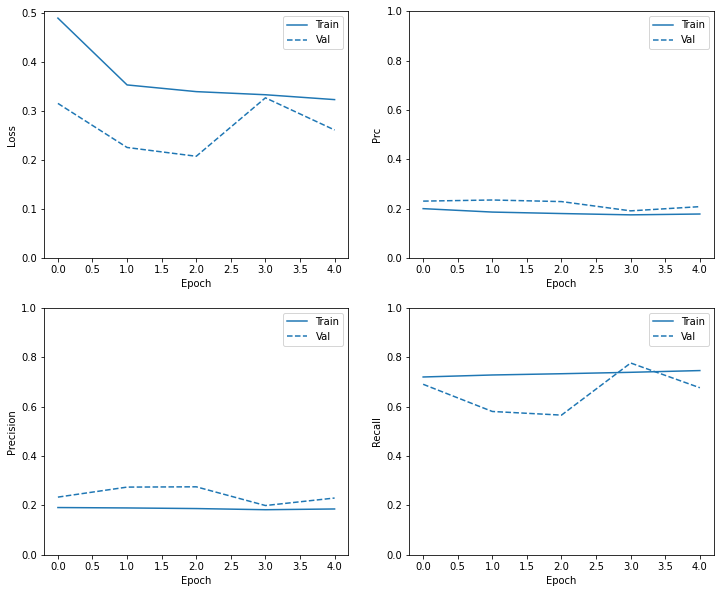

In [51]:
# plot history
plot_metrics(history)

In [104]:
# evaluate the model
results = model.evaluate(test_x, test_y, verbose=1)
print("Loss: {:0.4f}".format(results[0]))
print("Accuracy: {:0.4f}".format(results[5]))

1000/1000 [==============================] - 2s 2ms/step - loss: 0.3122 - tp: 1979.0000 - fp: 7704.0000 - tn: 21605.0000 - fn: 692.0000 - accuracy: 0.7375 - precision: 0.2044 - recall: 0.7409 - auc: 0.7561 - prc: 0.1960
Loss: 0.3122
Accuracy: 0.7375


In [54]:
# Sequential API
# normalization = layers.Normalization()
# normalization.adapt(np.array(train_x))

output_bias = tf.keras.initializers.Constant(initial_bias)

modelS = keras.Sequential([
  # normalization,
  layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
  layers.Dropout(0.5),
  layers.BatchNormalizationV2(),
  layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
  layers.Dropout(0.5),
  layers.BatchNormalizationV2(),
  layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
  layers.Dropout(0.5),
  layers.BatchNormalizationV2(),
  layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
  layers.Dropout(0.5),
  layers.BatchNormalizationV2(),
  layers.Dense(16, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
  layers.Dense(1, activation="sigmoid", bias_initializer=output_bias)
])

In [55]:
modelS.compile(optimizer='adam', loss='MeanSquaredError', metrics=METRICS)

In [ ]:
modelS.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 38)               77        
 ion)                                                            
                                                                 
 dense_11 (Dense)            (None, 256)               9984      
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_8 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 dropout_8 (Dropout)         (None, 256)              

In [56]:
historyS = modelS.fit(train_x, train_y, epochs=3, verbose=1, batch_size=256, validation_data=(val_x, val_y), class_weight=class_weight)

Epoch 1/3
1000/1000 [==============================] - 15s 13ms/step - loss: 0.7116 - tp: 16436.0000 - fp: 61705.0000 - tn: 201534.0000 - fn: 8141.0000 - accuracy: 0.7573 - precision: 0.2103 - recall: 0.6688 - auc: 0.7646 - prc: 0.2305 - val_loss: 0.1762 - val_tp: 1901.0000 - val_fp: 6090.0000 - val_tn: 23172.0000 - val_fn: 816.0000 - val_accuracy: 0.7840 - val_precision: 0.2379 - val_recall: 0.6997 - val_auc: 0.8198 - val_prc: 0.3318
Epoch 2/3
1000/1000 [==============================] - 12s 12ms/step - loss: 0.2068 - tp: 16838.0000 - fp: 68040.0000 - tn: 165890.0000 - fn: 5068.0000 - accuracy: 0.7142 - precision: 0.1984 - recall: 0.7686 - auc: 0.8046 - prc: 0.2869 - val_loss: 0.2445 - val_tp: 2318.0000 - val_fp: 11080.0000 - val_tn: 18182.0000 - val_fn: 399.0000 - val_accuracy: 0.6410 - val_precision: 0.1730 - val_recall: 0.8531 - val_auc: 0.8243 - val_prc: 0.3329
Epoch 3/3
1000/1000 [==============================] - 12s 12ms/step - loss: 0.2011 - tp: 17054.0000 - fp: 69747.0000 - t

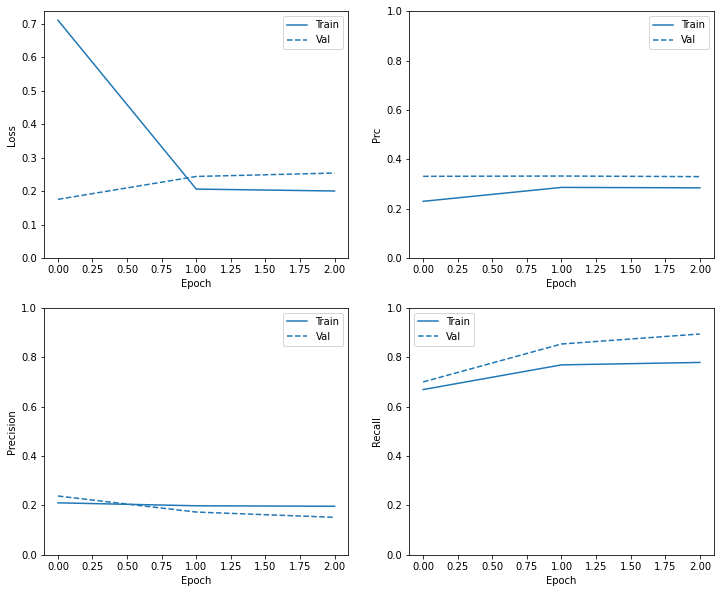

In [57]:
plot_metrics(historyS)

In [59]:
# evaluate the model
results = modelS.evaluate(test_x, test_y, verbose=1)
print("Loss: {:0.4f}".format(results[0]))
print("Accuracy: {:0.4f}".format(results[5]))

1000/1000 [==============================] - 2s 2ms/step - loss: 0.2582 - tp: 2421.0000 - fp: 13777.0000 - tn: 15532.0000 - fn: 250.0000 - accuracy: 0.5614 - precision: 0.1495 - recall: 0.9064 - auc: 0.8200 - prc: 0.3126
Loss: 0.2582
Accuracy: 0.5614


In [61]:
# predict the test case
prediction = model.predict(test_x)

1000/1000 [==============================] - 2s 2ms/step


dict_keys(['loss', 'accuracy'])


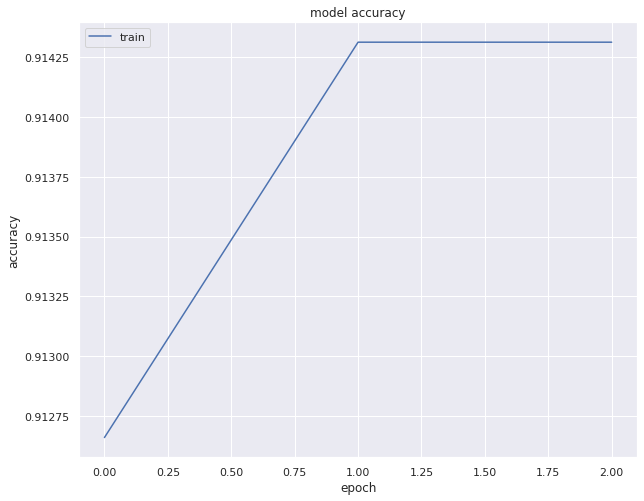

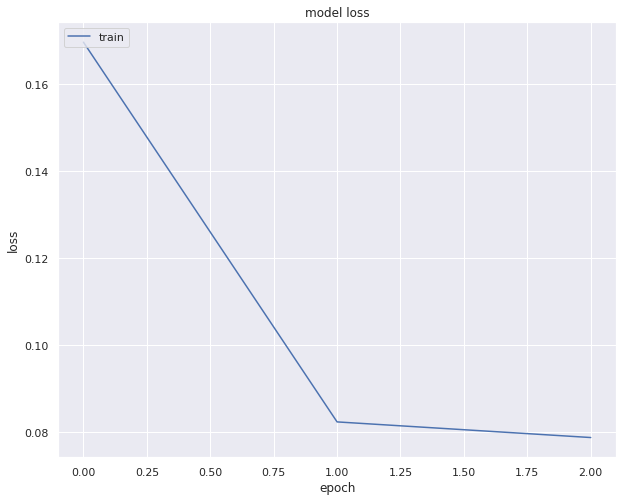

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
print(prediction)

[[6.8538393e-05]
 [4.9472914e-05]
 [3.6507008e-05]
 ...
 [5.9887359e-05]
 [2.1075518e-01]
 [4.9308528e-05]]


In [66]:
def convert_back(value):
  return np.where(value >= 0.5000000, 1.0, 0.0)

In [63]:
result = pd.DataFrame(prediction)
result.columns = ['HeartDieasePred']

In [65]:
result.describe()

,HeartDieasePred
count,31980.000000
mean,0.254256
std,0.428219
min,0.000024
25%,0.000032
50%,0.000049
75%,0.603736
max,1.000000


In [67]:
#test_y = test_y.reset_index()
#test_y = test_y.drop(labels='level_0', axis=1)
result_apply = result.apply(convert_back)
result_apply.columns = ["Rounded"]
result_test_cmp = result_apply.join(test_y)
result_test_cmp = result_test_cmp.join(result)

In [68]:
result_test_cmp.iloc[100:110]

,Rounded,HeartDisease,HeartDieasePred
100,1.0,NaN,0.999984
101,0.0,NaN,0.000027
102,0.0,NaN,0.000063
103,0.0,NaN,0.000029
104,0.0,NaN,0.000075
105,0.0,NaN,0.001322
106,1.0,NaN,1.000000
107,0.0,NaN,0.000058
108,0.0,NaN,0.000044
109,0.0,NaN,0.000049


In [ ]:
# Saving the Model
model.save("heart_disease_classification.h5")
new_model = tf.keras.models.load_models('heart_disease_classification.h5')

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [72]:
# Confusion Matrix
cm = confusion_matrix(test_y, result_apply)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

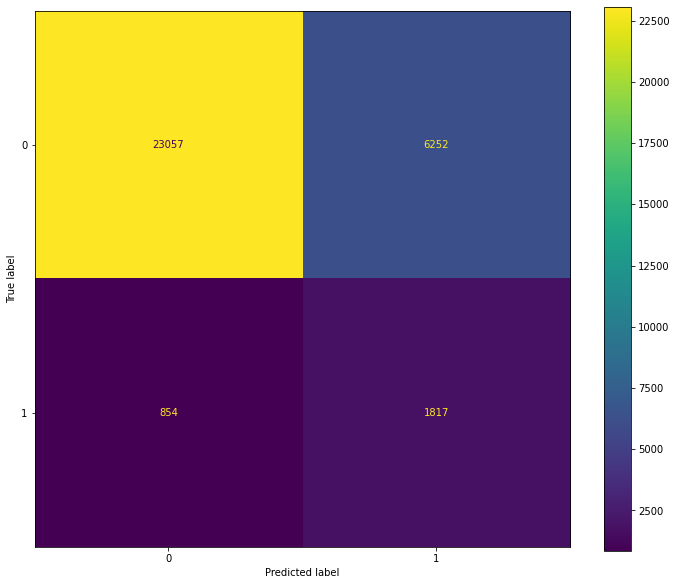

In [73]:
disp.plot()
plt.grid(False)
plt.show()

In [141]:
# Dummy Case
sample = {
    'BMI': [23.73, 90, 26, 12, 12, 12],
    'Smoking': ['No', 'Yes', 'No', 'No', 'No', 'No'],
    'AlcoholDrinking': ['No', 'Yes', 'No', 'No', 'No', 'No'],
    'Stroke': ['No', 'Yes', 'No', 'No', 'No', 'No'],
    'PhysicalHealth': [0.0, 30.0, 5.0, 0.0, 0.0, 0.0],
    'MentalHealth': [0.0, 30.0, 5.0, 0.0, 0.0, 0.0],
    'DiffWalking': ['No', 'Yes', 'No', 'No', 'No', 'No'],
    'Sex': ['Male', 'Female', 'Male', 'Female', 'Female', 'Female'],
    'AgeCategory': ["75-59", "75-79", "15-19", "75-79", "75-79", "75-79"],
    'Race': ['White', "American Indian/Alaskan Native", "Asian", "Black", "Other", "Hispanic"],
    'Diabetic': ['No', 'Yes', "No", "No, borderline diabetes", 'Yes', "Yes (during pregnacy)"],
    'PhysicalActivity': ['Yes', 'No', 'Yes', 'No', 'No', 'No'],
    'GenHealth': ["Good", "Poor", "Fair", "Excellent", "Very good", 'Poor'],
    'SleepTime': [12.0, 2.0, 7.0, 0.0, 0.0, 0.0],
    'Asthma': ['No', 'Yes', 'No', 'No', 'No', 'No'],
    'KidneyDisease': ['No', 'Yes', 'No', 'No', 'No', 'No'],
    'SkinCancer': ['No', 'Yes', 'No', 'No', 'No', 'No']
}
df = pd.DataFrame(sample)
binary = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
sample_encoded = pd.get_dummies(df, columns=binary)
age = sample_encoded.loc[:, 'AgeCategory']

def age_value(word):
  word = int(word[:2])
  if word == 80:
    return 85
  else:
    return (word+4)/2

age = age.apply(age_value, args=())
sample_encoded = sample_encoded.drop(labels="AgeCategory", axis=1)
sample_encoded = sample_encoded.join(age)

normalize = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'AgeCategory']
sample_scaler = sk.preprocessing.MinMaxScaler()
sample_dummy = scaler.fit(heart_encoded[normalize])
sample_dummy = scaler.transform(sample_encoded[normalize])
dummydf = pd.DataFrame(dummy, columns=normalize)
sample_encoded = sample_encoded.drop(labels=normalize, axis=1)
sample_encoded = sample_encoded.join(dummydf)

# The sample is just the first row
sample_encoded = sample_encoded.iloc[0:3]


In [142]:
sample_encoded.shape

(3, 38)

In [143]:
sample_encoded = np.array(sample_encoded)
sample_encoded = sample_encoded.reshape((sample_encoded.shape[0], 38))

In [144]:
sample_encoded.shape

(3, 38)

In [145]:
predictions = model.predict(sample_encoded)
print(predictions.shape)
for i in range(predictions.shape[0]):
  if predictions[i][0] <= 0.5:
    print(f"You will not get heart disease, the model predict {round(predictions[i][0]*100,4)}% to have heart disease")
  else:
    print(f"You might get heart disease, the model predict {round(predictions[i][0]*100,4)}% to have heart disease")


1/1 [==============================] - 0s 26ms/step
(3, 1)
You will not get heart disease, the model predict 0.0206% to have heart disease
You might get heart disease, the model predict 100.0% to have heart disease
You will not get heart disease, the model predict 0.3308% to have heart disease


# Oversampling
---
Another Method to try later

In [ ]:
pos_features = train_x[bool_train_labels]
neg_features = train_x[~bool_train_labels]

pos_labels = train_y[bool_train_labels]
neg_labels = train_y[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

print(res_pos_features.shape)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

print(resampled_features.shape)

In [ ]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)